## Twitter Data Analysis
* Connecting to twitter.com using a user authentication and its api.
* we can search tweets and get sentiment on about any topic using wide variety of methods.

In [2]:
#from tweepy.streaming import StreamListener
import tweepy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# To manipulate the twitter imported data
import json
import pandas as pd

In [8]:
#Variables that contains the user specific credentials to access Twitter API
# please create yours by going to dev.twitter.com
access_token = "3330087118-dnkNytgjujqLJg0RIlyHKgiZoix8DpEIV1iKXhW"
access_token_secret = "BTgKB6tvJ6xescB4J5OhC4OU2n0AnVAEf2CRZcirZ8zuo"
consumer_key = "hcuRfSV4aWjp9AjHazSat2HcS"
consumer_secret = "vLIArJmqrMWizqHcErInNjDECfjthkErErAE0nWIDRKBSmkJUE"

In [9]:
# Connecting to twitter using user credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Searching about any keyword in all the latest tweets
tweets_data=api.search('COVID-19',count=100, lang='en', include_rts=False, tweet_mode="extended")
print ("number of tweets found: "+ str(len(tweets_data)))


# Creating an empty data frame to store the tweets
tweets = pd.DataFrame()


for status in tweets_data:
    tweets=tweets.append(status._json,ignore_index=True)

TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]

In [4]:
# Looking at the data collected
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,retweeted,retweeted_status,source,truncated,user,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,None,None,Tue Jul 21 07:00:31 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @DrUjjalMajumde2: Amirul Islam was killed b...,None,1.285470e+18,...,0.0,{'created_at': 'Tue Jul 21 06:36:28 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1285423555941982208, 'id_str': '1285423...",NaN,NaN,NaN,NaN,NaN
1,None,None,Tue Jul 21 07:00:29 +0000 2020,"[0, 270]",{'hashtags': [{'text': 'MamatarShahidProhoson'...,0.0,0.0,Amirul Islam was killed brutally killed by TMC...,None,1.285470e+18,...,0.0,NaN,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1250704645787271170, 'id_str': '1250704...",NaN,NaN,NaN,NaN,NaN
2,None,None,Tue Jul 21 07:00:29 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @IAmHaamidBhat: Heartiest Congratulations t...,None,1.285470e+18,...,0.0,{'created_at': 'Mon Jul 20 03:03:10 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1248729127059722240, 'id_str': '1248729...",NaN,NaN,NaN,NaN,NaN
3,None,None,Tue Jul 21 07:00:27 +0000 2020,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @ravi_magdum: One of Worst PM India ever se...,None,1.285470e+18,...,0.0,{'created_at': 'Tue Jul 21 06:04:57 +0000 2020...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,"{'id': 770672821, 'id_str': '770672821', 'name...","{'media': [{'id': 1285455703910412288, 'id_str...",0.0,NaN,NaN,NaN
4,None,None,Tue Jul 21 07:00:26 +0000 2020,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @KishorBarmanBJP: Amirul Islam was killed b...,None,1.285470e+18,...,0.0,{'created_at': 'Tue Jul 21 06:15:56 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1119194767454195712, 'id_str': '1119194...",NaN,NaN,NaN,NaN,NaN


In [5]:
# Looking at only the tweet texts
tweets['full_text'].head(10)

0    RT @DrUjjalMajumde2: Amirul Islam was killed b...
1    Amirul Islam was killed brutally killed by TMC...
2    RT @IAmHaamidBhat: Heartiest Congratulations t...
3    RT @ravi_magdum: One of Worst PM India ever se...
4    RT @KishorBarmanBJP: Amirul Islam was killed b...
5    RT @ArchitaRoychow3: Amirul Islam was killed b...
6    RT @narendramodi: Had an extensive interaction...
7    RT @narendramodi: Had an extensive interaction...
8    RT @AnshumanSail: Just In : According to a lat...
9    RT @KishorBarmanBJP: Amirul Islam was killed b...
Name: full_text, dtype: object

## Sentiment analysis
Using bag of words model, finding the sentiment of every tweet found

In [8]:
# Reading positive and negative words list
PositiveWords=pd.read_table('Positive_words.txt',encoding='latin-1')
NegativeWords=pd.read_table('Negative_words.txt',encoding='latin-1')

In [9]:
# Defining a function to take a sentence as input and provide a sentiment fo it.
def ComputeSentimentScore(inputSentence):
    import re
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    # converting every word in lowercase
    newSentence=inputSentence.lower()
    
    # Removing everything which is not alphabets
    WordList= re.sub(r'[^a-z A-Z]',r'',newSentence)
    
    # Splitting the sentence into list of words
    WordList=WordList.split()
    
    # Iterate every word and check if it is present in the positive or negative word list
    for newWord in WordList:
        #print(newWord)
        if (newWord in NegativeWords.values):
            NegativeScore+=1
        if (newWord in PositiveWords.values):
            PositiveScore+=1
    #print('Final Positive Score:',PositiveScore)
    #print('Final Negative Score:',NegativeScore)
    #print('Overall Score:',PositiveScore-NegativeScore)
    
    if((PositiveScore-NegativeScore) > 0):
        OverallSentiment='Positive'
    else:
        OverallSentiment='Negative'
    return(OverallSentiment)

In [10]:
# Calling sentiment score function for every tweet
tweets['Sentiment']=tweets['full_text'].apply(ComputeSentimentScore)

# Printing sample rows to understand
tweets[['full_text', 'Sentiment']].head()

,full_text,Sentiment
0,RT @DrUjjalMajumde2: Amirul Islam was killed b...,Negative
1,Amirul Islam was killed brutally killed by TMC...,Negative
2,RT @IAmHaamidBhat: Heartiest Congratulations t...,Positive
3,RT @ravi_magdum: One of Worst PM India ever se...,Negative
4,RT @KishorBarmanBJP: Amirul Islam was killed b...,Negative


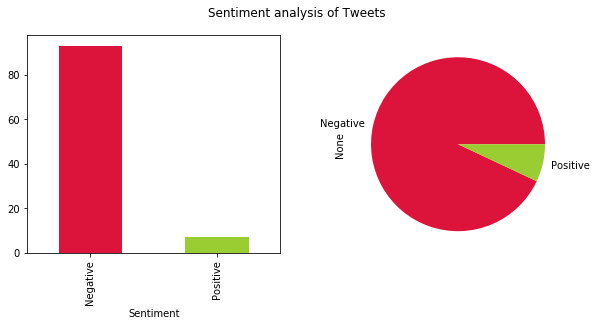

In [11]:
# Visualizing the overall sentiment distribution
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Tweets")

# Grouping the data
GroupedData=tweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson','yellowgreen'])

## Wordcloud analysis

In [12]:
# Extracting only the Tweet text
Tweet_Texts=tweets['full_text'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

In [13]:
# Observing the tweets text for junk
print(Tweets_String)

['RT @DrUjjalMajumde2: Amirul Islam was killed brutally killed by TMC goons just because he addressed the misgovernance of Mamata Banaerjee a…'
 'Amirul Islam was killed brutally killed by TMC goons just because he addressed the\nmisgovernance of Mamata Banaerjee and believed in the the ideology of Narendra Modi.\nIs this the price one has to pay for having a different opinion? #MamatarShahidProhoson \n@BJPMM4Bengal'
 "RT @IAmHaamidBhat: Heartiest Congratulations to the World's Most popular Politician Shri Narendra Modi Ji for Crossing of 60 Million Follow…"
 'RT @ravi_magdum: One of Worst PM India ever seen \nNarendra Modi you destroyed India \n   RT if agree https://t.co/imu9wZcZsM'
 'RT @KishorBarmanBJP: Amirul Islam was killed brutally killed by TMC goons just because he addressed the\nmisgovernance of Mamata Banaerjee a…'
 'RT @ArchitaRoychow3: Amirul Islam was killed brutally killed by TMC goons just because he addressed the misgovernance of Mamata Banaerjee a…'
 'RT @narendramod

### Data Preprocessing: Cleaning the text

In [14]:
# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)


# Deleting any word which is less than 4-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,3}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned

' amirul islam killed brutally killed goons just because addressed misgovernance mamata banaerjee amirul islam killed brutally killed goons just because addressed nmisgovernance mamata banaerjee believed ideology narendra modi this price having different opinion mamatarshahidprohoson heartiest congratulations world most popular politician shri narendra modi crossing million follow worst india ever seen nnarendra modi destroyed india agree amirul islam killed brutally killed goons just because addressed nmisgovernance mamata banaerjee amirul islam killed brutally killed goons just because addressed misgovernance mamata banaerjee extensive interaction with discussed several subjects relating technology extensive interaction with discussed several subjects relating technology just according latest report narendra modi twitter followers fake amirul islam killed brutally killed goons just because addressed nmisgovernance mamata banaerjee etenergyworld rollout much awaited smart metering beg

### Generating the wordcloud

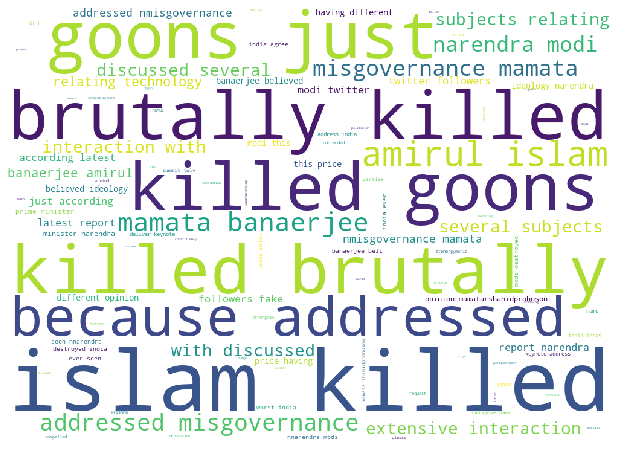

In [16]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt

# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['brutally','corona','virus','rt','day','https','will']

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()